# TD1 exo 1 sur le TFD (Corrigé Octave)

Exécution interactive en ligne ici [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/balaise31/Signal/master?labpath=discret%2Ftd%2FFREQ_code%2Fexo1_tfd_corr_octave.ipynb)

|        | Sujet | Corrigé |
|--------|-------|---------|
|Python  | [sujet python](./exo1_tfd.ipynb) | [corrigé python](./exo1_tfd_corr.ipynb) |
|Octave  | [sujet octave](./exo1_tfd_octave.ipynb) | [corrigé octave](./exo1_tfd_corr_octave.ipynb) |



Retour au [sujet de TD papier](../FREQ_sujet.ipynb)


## TFD avec l'algorithme fft
---
Là tout est simple car tout est discret et N périodique :

- $t= k T_e$ avec N points
- $f=k\Delta_f$ avec N points dans $[0, F_e [$ ouvert à droite !!!

Faisons un essai avec un TFD à 4 points. On peut utiliser l'algo FFT de calcul rapide de TFD d'octave/matlab...


t =

    0.000000    0.010000    0.020000    0.030000

f =

    0   25   50   75



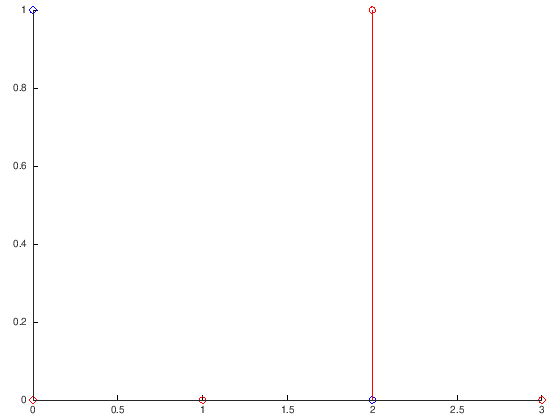

In [1]:
clear all;
close all;

N=4;
Fe=100; Te = 1/Fe;
%% VOTRE CODE : k= ? et t= ?
% déclarant un vecteur ligne k du segment entier [[0, 4[[ 
% le vecteur temps correspondant

k=(1:N)-1;   %astuce pour faire un vecteur de 0 à ?? avec N points...
t=k*Te 


%% VOTRE CODE : n= ? et f= Df=?
% déclarant un vecteur ligne n du segment entier [[0, 4[[ 
% le vecteur des 4 fréquences de [0 ; Fe[ <- semi ouvert ! 
% fréquences espacées de Df (la résolution fréquencielle ou le F0 des SdF)
Df=Fe/N ; n=k; f = n*Df

%% VOTRE CODE : delta = @(?) ?
% qui crée une fonction anonyme delta(k) qui vaut (k==0) 
delta = @(k) k==0 ; % impulsion unité discrète (astuce vaut 1 quand vrai)

l=2;
%% VOTRE CODE : x0 = ?; xl = ?
% qui utilise la fonction delta pour calculer x0 = delta(k)
% et xl = delta(k) retardée de l
x0 = delta(k);
xl = delta(k-l);

%% VOTRE CODE : stem (?,?,'r')
% qui affiche x0 et xl avec "stem" et "hold on" 
stem(k, x0,'b'); hold on;
stem(k, xl, 'r')



On peut maintenant faire `help fft` dans la console (File → New Console for Notebook)

Et afficher les TFD des signaux : Attention ils **sont complexes** 

   1   1   1   1
   1  -1   1  -1


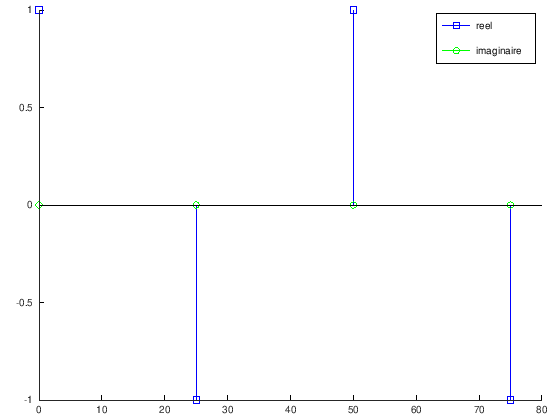

In [2]:
%% VOTRE CODE : tfd_x0 = ? et tfd_xl = ?
tfd_x0 = fft(x0);
tfd_xl = fft(xl);


% On affiche les vecteurs
disp(tfd_x0)
disp(tfd_xl)

% On fait un graphe du spectre (fréquenciel)
stem(f,real(tfd_xl),'bs'); hold on;
stem(f,imag(tfd_xl),'go');
legend(["reel"; "imaginaire"])


## TFD Matricielle
---

On peut créer une matrice avec en rangées tous les vecteurs de la base fréquencielle $w_0$ à $w_{N-1}$ et en colonne le temps pour $k$ de 0 à $N-1$. Puis utiliser cette matrice pour calculer tous les produits scalaires d'un signal avec les vecteurs $w_n$ : ce sont les coordonnées fréquentielles du signal donc la TFD.

### Construction de la matrice des vecteurs fréquenciels $w_n$
---
Inspirez-vous de ce qui est fait avec 3 échantillons dans [VEC2 TFD matriciel](../..//cours/notebooks/VEC2_bases_frequentielles.ipynb#Base-fr%C3%A9quentielle-orthogonale-:-TFD)

Construisez une représentation matricielle contenant chaque vecteur $w_i$ de la base en colonne : 
  * la matrice `s` avec un échantillonnage presque continu du temps k (en rangées) 
  * la matrice `W` avec seulement 4 échantillons temporels (en rangées toujours)
les colonnes sont liées aux fréquences :

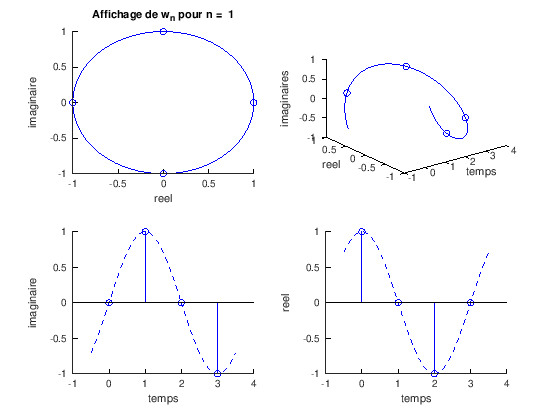

In [3]:
%% MODIFIEZ LE CODE ISSU DE VEC2 : pour passer en 4 échantillons
N = 4; %ICI 
t=-0.5:0.01:3.5 ; 
k = 0:(N-1) ;  %ICI Aussi

Fe= 1; 
Df = Fe/N; % On peut le nommer f0 pour évoquer les SdF
n = 0:(N-1);  % ICI encore
f = n*Df;

s  = exp(i*2*pi*Df*t'*n);  
W =  exp(i*2*pi*Df*k'*n);

addpath("../../cours/notebooks/utiles")  


%% MODIFIEZ ICI !

avoir=1; %% CHANGEZ le nombre pour sélectionner w_i à afficher
%avoir=0:3; %% DECOMMENTEZ pour tout afficher

affiche3d(t,s(:,(avoir+1)),k,W(:,(avoir+1)));  % ICI pour voir juste w2
subplot(2,2,1); title(["Affichage de w_n pour n =  " num2str(avoir)])

Vérifions que l'on a bien une base orthonormée.

Pour cela on calcule le produit scalaire discret avec les vecteurs coordonnées  $<\!<u,v>\!> = \overline{{}^T\!{V}}. U$

La transposée du conjugué est dite la **transposée Hilbertienne** et est notée $V^H=\overline{{}^T\!{V}}$.

Avec octave on utilise l'apostrophe `V'`=$V^H$

Si l'on calcule $W^H.W$ nous obtenons ainsi tous les produits scalaires de la base.



In [4]:
% On extrait deux vecteurs
w0 = W(:,1); 
w2 = W(:,2);

arrondi = @(x) round(x*100)/100;

%% VOTRE CODE : scal_w0_w2 = ?  norme_w2 = ?
%calculant les produits scalaires <w_0,w_2> et <w_2,w_2>
scal_w0_w2 = w2' * w0  ;
norm_carre_w2 = w2' * w2  ;

arrondi(scal_w0_w2)
arrondi(norm_carre_w2)
%Tous les produits scalaires
scalaires = W'*W;
arrondi(scalaires)


ans = -0
ans =  4
ans =

   4  -0   0   0
  -0   4  -0  -0
   0  -0   4  -0
   0  -0  -0   4



La matrice $W^H=(\overline{W_N^{nk}})_{0<n,k<N-1}$, est bien orthogonale (dans $\mathbb{C}$) avec
$$ W. W^H = N . Id$$ mais pas normée.

Avec $W^H$ dite la matrice adjointe ou transposée de Hilbert : transposée du conjugué.

Et donc $W^{-1}=W^H/N$ 

Donc on peut calculer une tranformée en fréquence avec $W^H$ et son inverse avec $W/N$ :

$s \overset{TFD}{\longrightarrow} \hat{S} = W^H.s \overset{TFD^{-1}}{\longrightarrow} s = \frac{W}{N} \,.\, \hat{S} = \frac{W}{N} \,.\, W^H.s = Id.s = s $


### Calcul de la TFD en matriciel

On utilise alors la matrice $W^H$ pour passer du temporel vers le fréquentiel :

$W^H . s  =  \hat{S}$

Dans la suite, nous recalculons $M=W^H$ directement avec $W^H = \left({W_N}^{n.k}\right)_{k,n}$ (maintenant k en rangée et n en colonne pour **transposer**) avec $W_N=e^{-i\frac{2\pi}{N}}$ le **conjugué** de la racine Nème de l'unité. 


In [9]:
N=4;
W_N = exp(-i*2*pi/N); % on prend directement le conjugué
% cette fois-ci k est horizontal et n vertical
% car on veut directement la transposée
k=0:(N-1);
n = k;

M_tfd = W_N.^(n'*k);

%% VOTRE CODE : verif que M = W^H noté W' en octave
erreur = sum(sum(abs(arrondi(M_tfd-W'))))



M_tfdi = M_tfd'/N; % transformée inverse par simple transposé de hilbert
tfdi_de_tfd = arrondi(M_tfdi * M_tfd) % On doit avoir la matrice identité

%% VOTRE CODE : x0 = , xl = , x = 
% avec x le signal (1,-1,1,-1). en octave [1,2] est une matrice ligne et [1; 2] colonne
% attention le vecteur signal doit être vertical !
% transpose(x) est différent de x' !
x0 = delta(k');  % vecteur colonne
xl = delta(k'-l);
x=[1; -1; 1; -1];

disp(["  x0", "  xl", "   x"])
disp(arrondi([ x0, xl, x]))

% VOTRE CODE : tfd_x0 =  ,  tfd_xl =  ,tfd_x =   ,  
% calculer matriciellement les transformées 
tfd_x0 = M_tfd*x0 ;
tfd_xl = M_tfd*xl;
tfd_x = M_tfd*x ;

disp(["tfd(x0", " xl", "  x )"])
disp(arrondi([ tfd_x0, tfd_xl, tfd_x]))

%% VOTRE CODE : fft_x0, fft_xl, fft_x
% calculer avec l'algo fft de octave  les transformées 
fft_x0 = fft(x0) ;
fft_xl = fft(xl) ;
fft_x = fft(x) ;
disp(["fft(x0", " xl", "  x )"])
disp(arrondi([ fft_x0, fft_xl, fft_x]))

erreur = 0
tfdi_de_tfd =

   1  -0   0   0
  -0   1  -0  -0
   0  -0   1  -0
   0  -0  -0   1

  x0  xl   x
   1   0   1
   0   0  -1
   0   1   1
   0   0  -1
tfd(x0 xl  x )
   1   1   0
   1  -1   0
   1   1   4
   1  -1  -0
fft(x0 xl  x )
   1   1   0
   1  -1   0
   1   1   4
   1  -1   0


On peut constater que la base fréquencielle n'est pas normée (vecteurs de norme $\sqrt{N}$, car $<< \vec{w_n}, \vec{w_n}>> = N$), la norme du signal mesurée en fréquenciel $\sqrt{<\hat{S},\hat{S}>}$ est amplifié. Coefficients $\sqrt{N}$ fois trop grands et norme du vecteur fréquenciel $\sqrt{N}$ fois trop grande. On ne divise pas par N par convention permettant d'économiser du temps de calcul. 

In [6]:
norme = @(x) sqrt(x'*x);
norme(fft_x0)/norme(x0)
norme(fft_xl)/norme(xl)
norme(fft_x)/norme(x)

sqrt(N)

ans =  2
ans =  2
ans =  2
ans =  2


L'idéal serait de diviser par N d'abord pour être normé et avoir : 

$s \overset{\text{TFD normée}}{\longrightarrow} \hat{S} = \frac{W^H}{N}.s  \overset{\text{TFD norm}^{-1}}{\longrightarrow} s =  W. \hat{S}$ 

Mais on a une TFD non normée qu'il faut compenser en réciproque en divisant par N :

$s \overset{\text{TFD}}{\longrightarrow} \hat{S} = {W^H}.s  \overset{\text{TFD}^{-1}\text{compensée} }{\longrightarrow} s =  \frac{W}{N}. \hat{S}$ 

> Les coefficients de la TFD sont donc laissé N fois trop grand ce qui fait 


In [7]:
norme(fft_x0/N)/norme(x0)
norme(fft_xl/N)/norme(xl)
norme(fft_x/N)/norme(x)


ans =  0.50000
ans =  0.50000
ans =  0.50000
